<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP3/TP3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2:  Clasificadores no paramétricos

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar aplicativos que permitan dar solvencia a los problemas propuestos en la materia.
## Objetivos Específicos
*   Desarrollar clasificadores supervisados K vecinos más cercanos que den solución a los ejercicios planteados en el trabajo práctico 
*   Mediante la selección de datos proponer un clasificador supervisado KNN entrenado.
*   Visualización de resultados

###Problema
El presente trabajo práctico da solución a los siguientes ejercicios:
**Ejercicio 1** Supongamos que tenemos un dataset mezcla de dos grupos aleatorios bidimensionales (cada uno con 100 datos, su centroide y covariancia)
 Encontrar un clasificador por K-NN y evaluar exactitud, precisión, f-measure. Tomar inicialmente un dataset de entrenamiento de N=100 (50+50), k=10, y validar con el resto del dataset. Hacer algunos experimentos con otros N y k, y 
también cambiando centroide y covariancia de las clases.
  *   ¿Cambia mucho si el dataset tiene más dimensiones?

**Ejercicio 2** En el notebook https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/musica.ipynb  hay un dataset con 2000+ canciones de Spotify de una usuaria, donde algunas fueron marcadas como gustadas y otras no. Cada canción tiene a su vez 16 atributos (nombre, artista, duración, bailable, etc.)
*   Desarrollar un clasificador que prediga si una canción dada va a ser gustada o no. Aclarar y justificar los pasos, analizar y explicar los resultados.


###Solución
Se plantea posibles soluciones, para el primer problema se desarrolla un aplicativo que genera 2 dataset de distribución normal, la media de la distribución, la desviación estándar y el tamaño de la tupla son seleccionadas por el usuario; se concatena y ordena para posterior obtener un clasificador supervisado K-NN, los resultados serán evaluados con n_neighbors = 1 & 10.

Para el segundo ejercicio, se muestran los atributos y datos del dataset, se evalúan los atributos que portarán significancia al clasificador mediante la correlación de los datos de cada columna. Visualización de la distribución de los datos mediante scatterplots, tomando como eje X el atributo "energy" dado su alta importancia. Posterior, los datos ingresan al clasificador supervisado K-NN sin entrenamiento y se evalúa con n_neighbors = 10.
Se normalizan los datos utilizando la función StandardScaler() de sklearn, se entrena al clasificador y se evalúan los resultados con n_neighbors = 10.

In [1]:
#Lectura de librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [2]:
#Función norm_dist: Retorna 2 dataset con distribución normal
def norm_dist(loc_1, scale_1, size_1, loc_2, scale_2, size_2):
    size_1 = int(size_1/2)
    size_2= int(size_2/2)
    A_dis = np.random.normal(loc_1,scale_1,size_1)                      
    B_dis = np.random.normal(loc_2,scale_2,size_2)
    At = np.around(np.random.uniform(1, 1.5, size=50),size_1)
    At2 = np.around(np.random.uniform(1, 0.5, size=50),size_2)

    A_df = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_1))
    A_df['Valor'] = A_dis
    A_df['Etiqueta'] = 'A'
    A_df['Atributo'] = At

    B_df = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_1))
    B_df['Etiqueta'] = 'B'
    B_df['Valor'] = A_dis
    B_df['Atributo'] = At2

    df1 = pd.concat([A_df, B_df])

    A_df1 = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_2))
    A_df1['Valor'] = B_dis
    A_df1['Etiqueta'] = 'C'
    A_df1['Atributo'] = At

    B_df1 = pd.DataFrame(columns=['Etiqueta', 'Valor','Atributo'], index=range(size_2))
    B_df1['Etiqueta'] = 'D'
    B_df1['Valor'] = B_dis
    B_df1['Atributo'] = At2

    df2 = pd.concat([A_df1, B_df1])

    return df1, df2

Primero, la función norm_dist permite crear 2 dataset con distribución normal, cada una con 2 etiquetas, para ello, el usuario determina los parámetros para cada dataset mediante scrollbar.

In [3]:
#@title Seleccione los parámetros para la distribución normal Dataset 1 { run: "auto" }
loc_1 = 30 #@param {type:"slider", min:30, max:60, step:5}
scale_1 = 10 #@param {type:"slider", min:1, max:10, step:1}
size_1 = 100 #@param {type:"slider", min:50, max:150, step:25}

In [4]:
#@title Seleccione los parámetros para la distribución normal Dataset 2 { run: "auto" }
loc_2 = 40 #@param {type:"slider", min:40, max:80, step:5}
scale_2 = 10 #@param {type:"slider", min:0, max:10, step:2}
size_2 = 100 #@param {type:"slider", min:50, max:150, step:25}

Visualización de parámetros del dataset como: percentiles, desviación STD, media, número de datos

In [5]:
dataset1, dataset2 = norm_dist (loc_1, scale_1, size_1, loc_2, scale_2, size_2)
#Función describe, retorna parámetros como: percentiles, desviación STD, media, número de datos
dataset1.describe()

,Valor,Atributo
count,100.000000,100.000000
mean,29.000530,1.025845
std,9.335357,0.273163
min,8.402355,0.508904
25%,22.481253,0.824754
50%,30.546468,1.002655
75%,35.138363,1.277032
max,56.195723,1.497694


In [6]:
dataset2.describe()

,Valor,Atributo
count,100.000000,100.000000
mean,41.586602,1.025845
std,9.030714,0.273163
min,20.444916,0.508904
25%,36.336478,0.824754
50%,41.301880,1.002655
75%,46.900749,1.277032
max,60.597445,1.497694


Visualización de 10 datos de cada dataset

In [7]:
dataset1.sample(10)

,Etiqueta,Valor,Atributo
43,A,31.138541,1.160162
13,B,23.391904,0.708868
33,A,45.420991,1.071878
2,B,33.946716,0.951143
0,B,20.799882,0.836830
48,A,29.795713,1.009113
34,B,31.568096,0.968378
18,B,28.085857,0.929915
20,B,35.769013,0.546820
31,A,33.522376,1.382288


In [8]:
dataset2.sample(10)

,Etiqueta,Valor,Atributo
39,C,60.597445,1.241330
4,D,30.040682,0.752916
29,C,41.420926,1.239672
37,C,45.274964,1.102027
29,D,41.420926,0.906080
18,C,43.975303,1.427590
38,C,51.273500,1.262740
19,D,38.161839,0.905612
36,D,25.987496,0.687357
0,D,34.993484,0.836830


Se concatenan y ordenan los datos, obteniento un solo dataset con N=200

In [9]:
#Concatenación de los dataset
df = pd.concat([dataset1, dataset2])

In [10]:
#Se ordenan los datos
df_ord = df
df_ord.sort_values('Valor', inplace=True, ignore_index=True)
df_ord

,Etiqueta,Valor,Atributo
0,A,8.402355,1.495551
1,B,8.402355,0.917768
2,A,9.818850,1.320910
3,B,9.818850,0.752916
4,A,15.030095,1.442648
...,...,...,...
195,C,58.165155,1.352704
196,D,58.620840,0.909827
197,C,58.620840,1.055377
198,C,60.597445,1.241330


In [11]:
print("forma del dataset")
print(df_ord.Valor.shape)

forma del dataset
(200,)


Visualización de la distribución de los datos mediante un scatterplot, cada etiqueta tiene un color distintivo.

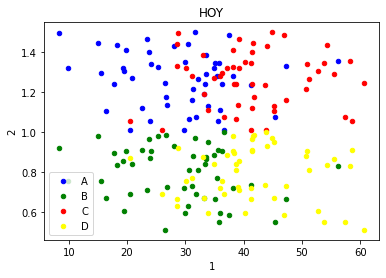

In [12]:
fig = df_ord[df_ord.Etiqueta == 'A'].plot(kind='scatter', x='Valor', y='Atributo', color='blue', label='A')
df_ord[df_ord.Etiqueta == 'B'].plot(kind='scatter', x='Valor', y='Atributo', color='green', label='B', ax=fig)
df_ord[df_ord.Etiqueta == 'C'].plot(kind='scatter', x='Valor', y='Atributo', color='red', label='C', ax=fig)
df_ord[df_ord.Etiqueta == 'D'].plot(kind='scatter', x='Valor', y='Atributo', color='yellow', label='D', ax=fig)
fig.set_xlabel('1')
fig.set_ylabel('2')
fig.set_title('HOY')
plt.show()

El siguiente paso es llamar al clasificador K vecinos más cercanos de la librería sklearn usando el código .KNeighborsClassifier determinando el número de vecinos cuya distancia se va a comparar. Observamos resultados para n_neighbors = 1 & 10.

In [13]:
#K_NN 1 vecino
X = np.array(df_ord.drop(['Etiqueta'], 1))
y = np.array(df_ord['Etiqueta'])
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
Y_pred = knn.predict(X)
print('Precisión Vecinos más Cercanos: {}'.format(knn.score(X, y)))
print(knn.predict_proba([[41,2.6]]))
print(knn.predict([[41,2.6]]))

Precisión Vecinos más Cercanos: 1.0
[[0. 0. 1. 0.]]
['C']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [14]:
#K_NN 10 vecinos
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
Y_pred = knn.predict(X)
print('Precisión Vecinos más Cercanos: {}'.format(knn.score(X, y)))
print(knn.predict_proba([[41,2.6]]))
print(knn.predict([[41,2.6]]))

Precisión Vecinos más Cercanos: 0.545
[[0.1 0.  0.8 0.1]]
['C']


Para mejorar los resultados del clasificador, se realiza un proceso de entrenamiento, para ello, el usuario debe seleccionar el porcentaje de datos que se utilizará en el entrenamiento.
Observamos resultados para n_neighbors = 10.

In [15]:
#@title Seleccione el procentaje de entrenamiento { run: "auto" }
test_size1 = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
X_ent = np.array(df_ord.drop(['Etiqueta'], 1))
y_ent = np.array(df_ord['Etiqueta'])
X_train_ent, X_test_ent, y_train_ent, y_test_ent = train_test_split(X_ent, y_ent, test_size=test_size1)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train_ent.shape[0], X_test_ent.shape[0]))

Son 100 datos para entrenamiento y 100 datos para prueba


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
#@title Seleccione la cantidad de vecinos para K-NN { run: "auto" }
n_neighbors = 10 #@param {type:"slider", min:1, max:20, step:1}

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_ent, y_train_ent)
Y_pred = knn.predict(X_test_ent)
print('Precisión Vecinos más Cercanos: {}'.format(knn.score(X_ent, y_ent)))
print(knn.predict_proba([[41,2.6]]))
print(knn.predict([[41,2.6]]))

Precisión Vecinos más Cercanos: 0.44
[[0.1 0.  0.5 0.4]]
['C']


In [17]:
precision = precision_score(y_test_ent, Y_pred, average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test_ent, Y_pred, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(y_test_ent, Y_pred, average='weighted')
print('F-Measure: %.3f' % score)

Precision: 0.390
Recall: 0.390
F-Measure: 0.382


###Ejercicio 2

In [18]:
#Carga del dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [19]:
#Eliminamos el atributo 'Unnamed: 0' dado su duplicidad con index
attributes_spotify_df = attributes_spotify.drop(['Unnamed: 0'], 1)
#.corr() usado para visualizar la correlación de los datos de la columna
attributes_spotify.corr()['target']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Unnamed: 0         -0.865969
acousticness       -0.129627
danceability        0.176706
duration_ms         0.146749
energy              0.039688
instrumentalness    0.152594
key                 0.033594
liveness            0.026364
loudness           -0.072000
mode               -0.072336
speechiness         0.154006
tempo               0.034732
time_signature      0.040182
valence             0.107930
target              1.000000
Name: target, dtype: float64

Al revisar el dataset podemos observar que existen atributos que no aportan mayor información, tales como "song_title", "artist", "key", "mode", a pesar de su importancia, los atributos mencionados no ayudan a una persona a definir si la canción le gusta.

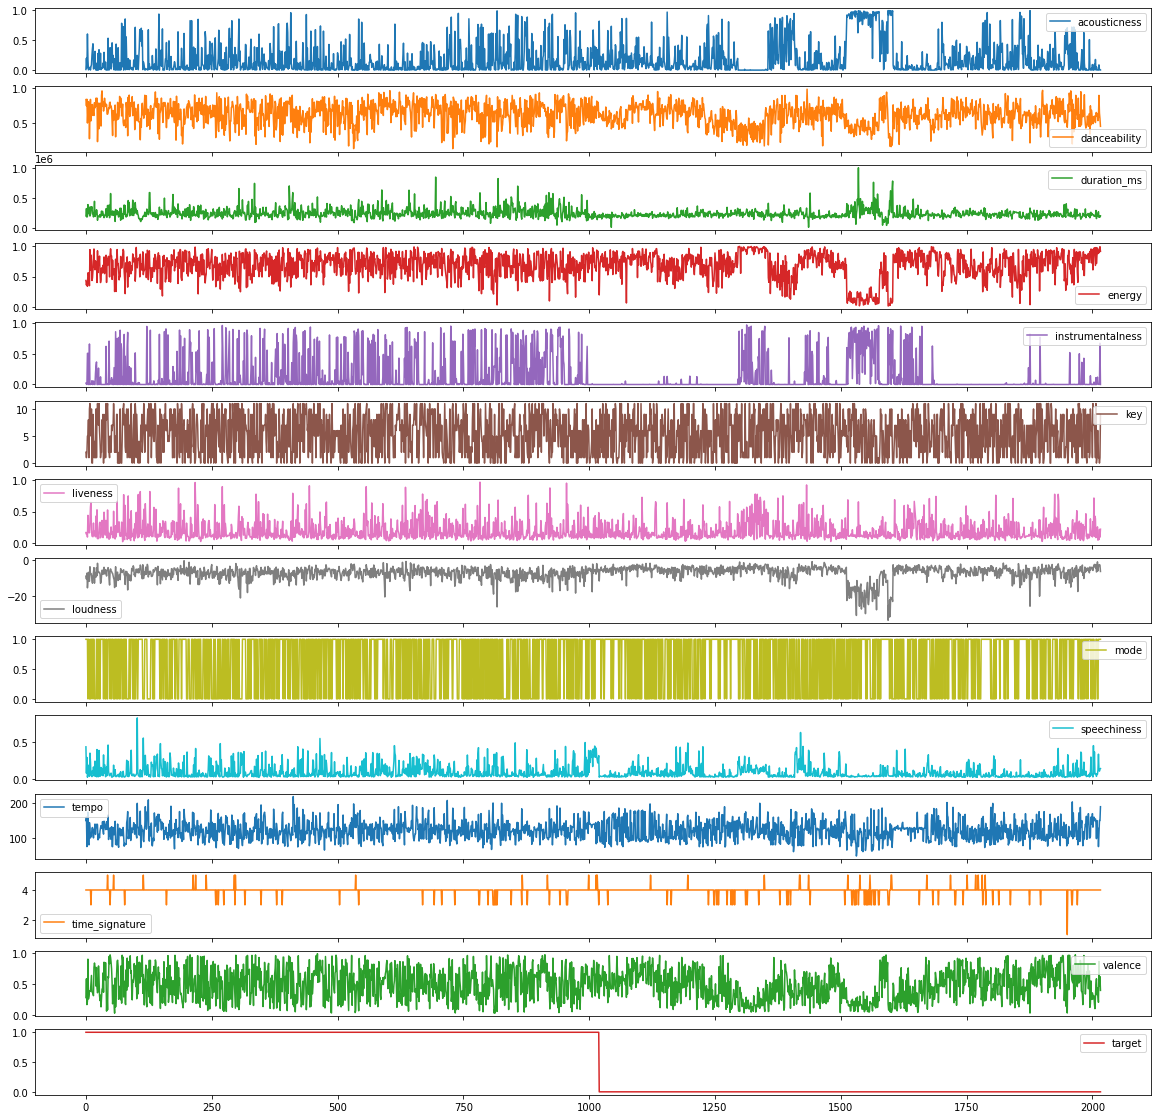

In [20]:
attributes_spotify_df.plot(label='target', subplots=True, figsize=(20,20))
plt.show()

Visualización de la distribución de los datos mediante un scatterplot tomando como eje X el atributo "energy"

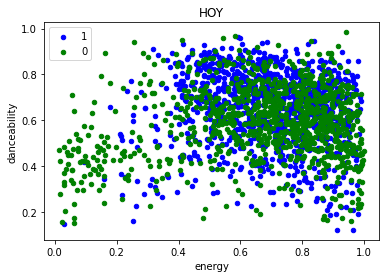

In [21]:
fig = attributes_spotify_df[attributes_spotify_df.target == 1].plot(kind='scatter', x='energy', y='danceability', color='blue', label='1')
attributes_spotify_df[attributes_spotify_df.target == 0].plot(kind='scatter', x='energy', y='danceability', color='green', label='0', ax=fig)
fig.set_xlabel('energy')
fig.set_ylabel('danceability')
fig.set_title('HOY')
plt.show()

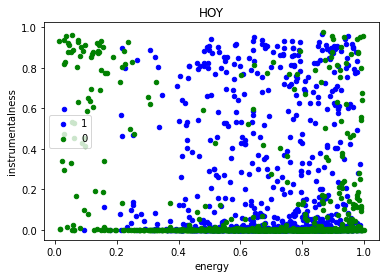

In [22]:
fig = attributes_spotify_df[attributes_spotify_df.target == 1].plot(kind='scatter', x='energy', y='instrumentalness', color='blue', label='1')
attributes_spotify_df[attributes_spotify_df.target == 0].plot(kind='scatter', x='energy', y='instrumentalness', color='green', label='0', ax=fig)
fig.set_xlabel('energy')
fig.set_ylabel('instrumentalness')
fig.set_title('HOY')
plt.show()

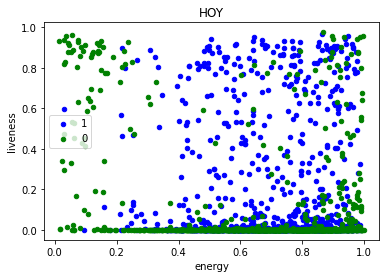

In [23]:
fig = attributes_spotify_df[attributes_spotify_df.target == 1].plot(kind='scatter', x='energy', y='instrumentalness', color='blue', label='1')
attributes_spotify_df[attributes_spotify_df.target == 0].plot(kind='scatter', x='energy', y='instrumentalness', color='green', label='0', ax=fig)
fig.set_xlabel('energy')
fig.set_ylabel('liveness')
fig.set_title('HOY')
plt.show()

El siguiente paso es llamar al clasificador K vecinos más cercanos de la librería sklearn usando el código .KNeighborsClassifier determinando el número de vecinos cuya distancia se va a comparar. Observamos resultados para n_neighbors = 10 y distribución de datos: [0.01020,0.833,204600,0.434,0.021900, 0.1650,-8.795,0.4310,150.062,0.286]

In [24]:
#Eliminación de atributos
X1 = np.array(attributes_spotify_df.drop(['target','key','mode','time_signature','song_title','artist'], 1))
y1 = np.array(attributes_spotify_df['target'])
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X1, y1)
Y1_pred = knn.predict(X1)
print('Precisión Vecinos más Cercanos: {}'.format(knn.score(X1, y1)))
print(knn.predict_proba([[0.01020,0.833,204600,0.434,0.021900, 0.1650,-8.795,0.4310,150.062,0.286]]))
print(knn.predict([[0.01020,0.833,204600,0.434,0.021900, 0.1650,-8.795,0.4310,150.062,0.286]]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Precisión Vecinos más Cercanos: 0.6717897868120972
[[0.8 0.2]]
[0]


###Normalización de valores
StandardScaler() permite estandarizar las características eliminando la media y escalando a la varianza de la unidad

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2 = np.array(attributes_spotify_df.drop(['target','key','mode','time_signature','song_title','artist'], 1))
y2 = np.array(attributes_spotify_df['target'])
scaler.fit(X2)
X_new = scaler.transform(X2)
X_norm = pd.DataFrame(X_new)
X_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-0.346454,-0.881573,-0.147529,1.442323,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.204897,-0.016586,2.183712,-1.745166,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.634715,-2.167220,-0.740350,-1.316964,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,1.596735,-1.213155,-0.258753,1.964120,1.647627
...,...,...,...,...,...,...,...,...,...,...
2012,-0.717631,-0.213815,0.342817,1.191237,-0.478206,-0.397929,0.953167,2.673095,-1.747715,-1.156518
2013,-0.384304,1.711782,-0.782370,1.000961,-0.481941,-0.888231,1.175995,0.426383,-0.433385,1.497911
2014,-0.688738,0.115400,-0.477129,1.205508,-0.473446,0.148995,1.228112,0.159447,1.067459,-0.108504
2015,-0.715399,-0.381529,-0.740667,1.476651,1.990939,-0.640506,1.156850,0.448628,1.064798,0.510593


###Entrenamiento del clasificador
Para mejorar los resultados del clasificador, se realiza un proceso de entrenamiento. Observamos resultados para n_neighbors = 10.
Se prueba el clasificador con la siguiente distribución de datos: [-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039]

In [26]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_norm, y2, test_size=0.1)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train2.shape[0], X_test2.shape[0]))

Son 1815 datos para entrenamiento y 202 datos para prueba


In [27]:
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train2, y_train2)
Y_pred = knn.predict(X_test2)
print('Precisión Vecinos más Cercanos: {}'.format(knn.score(X2, y2)))
print(knn.predict_proba([[-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039]]))
print(knn.predict([[-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039]]))

Precisión Vecinos más Cercanos: 0.5057015369360436
[[0.1 0.9]]
[1]
